# Chapter 2: Distributions

In [2]:
from __future__ import print_function, division

%matplotlib inline

import nsfg
import first

import sys
import numpy as np
import thinkstats2

from collections import defaultdict

In [4]:
t = [1,2,2,3,5,6,6,7,8,9,10,11,12,22,21,22,22,44,44,55,3,4,5,7,8,9,
    4,4,5,6,66,66,66,7,8]

Use a dictionary to count the requency of each value

In [5]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1

hist

{1: 1,
 2: 2,
 3: 2,
 5: 3,
 6: 3,
 7: 3,
 8: 3,
 9: 2,
 10: 1,
 11: 1,
 12: 1,
 22: 3,
 21: 1,
 44: 2,
 55: 1,
 4: 3,
 66: 3}

Or you can use 'Counter' (a dictionary with additional methods)

In [6]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1,
         2: 2,
         3: 2,
         5: 3,
         6: 3,
         7: 3,
         8: 3,
         9: 2,
         10: 1,
         11: 1,
         12: 1,
         22: 3,
         21: 1,
         44: 2,
         55: 1,
         4: 3,
         66: 3})

Or you can use the `Hist` object provided by `thinkstats2`:

In [7]:
hist = thinkstats2.Hist(t)
hist

Hist({1: 1, 2: 2, 3: 2, 5: 3, 6: 3, 7: 3, 8: 3, 9: 2, 10: 1, 11: 1, 12: 1, 22: 3, 21: 1, 44: 2, 55: 1, 4: 3, 66: 3})

In [10]:
hist.Freq(8)

3

In [12]:
hist.Values() # returns the unique values

dict_keys([1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 22, 21, 44, 55, 4, 66])

So you can iterate the values and their frequencies like this:

In [13]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 2
4 3
5 3
6 3
7 3
8 3
9 2
10 1
11 1
12 1
21 1
22 3
44 2
55 1
66 3


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

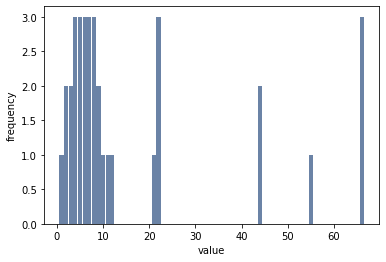

In [22]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

In [23]:
# Example from the book

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

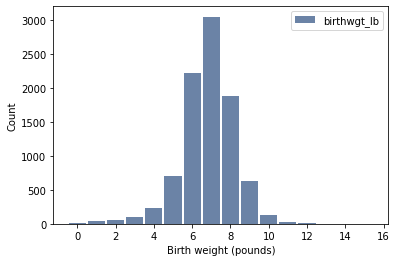

In [28]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Apply 'floor' to round

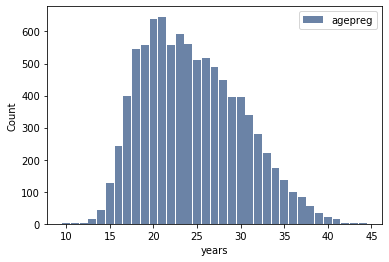

In [29]:
ages = np.floor(live.agepreg)
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

## Exercise 4

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [44]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

In [43]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

Cohen's d = -0.0887

Differences in Cohen's Effects are small for both total weight and pregnancy length. However, the effect for weight is negative, while the effect for pregnancy length is positive. 

In [31]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    
    diff  = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [36]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [35]:
# Let's create a dataframe filtering for first-borns only

firsts = live[live.birthord == 1]

In [39]:
# Let's create another dataframe for all other babies
others = live[live.birthord != 1]

0.028879044654449883